In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esmeraldaypsilanti","key":"efea1b7d08611736b606c62642cc42d1"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!kaggle competitions download -c avito-demand-prediction -p /content/drive/My\ Drive/avito_kaggle

 99% 2.45G/2.46G [00:24<00:00, 132MB/s]
100% 2.46G/2.46G [00:24<00:00, 108MB/s]
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_jpg_2.zip: Skipping, found more recently modified local copy (use --force to force download)
train_jpg_4.zip: Skipping, found more recently modified local copy (use --force to force download)
periods_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
100% 49.4G/49.4G [14:45<00:00, 39.3MB/s]
100% 49.4G/49.4G [14:45<00:00, 59.9MB/s]
periods_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_jpg_0.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
100% 9.92G/9.92G [05:27<00:00,

In [ ]:
!cp "/content/gdrive/My Drive/avito_kaggle/periods_test.cdv.zip" "/content/drive/My Drive/avito_kaggle"

cp: cannot stat '/content/gdrive/My Drive/avito_kaggle/periods_test.cdv.zip': No such file or directory


In [ ]:
!unzip "/content/drive/My\ Drive/avito_kaggle/


In [ ]:
#!unzip "/content/gdrive/My Drive/AVITO/periods_test.csv.zip" -d "/content/gdrive/My Drive/AVITO"
#!unzip "/content/gdrive/My Drive/AVITO/periods_train.csv.zip" -d "/content/gdrive/My Drive/AVITO"
#!unzip "/content/gdrive/My Drive/AVITO/train.csv.zip" -d "/content/gdrive/My Drive/AVITO"
#!unzip "/content/gdrive/My Drive/AVITO/test.csv.zip" -d "/content/gdrive/My Drive/AVITO"
#!unzip "/content/gdrive/My Drive/AVITO/train_active.csv.zip" -d "/content/gdrive/My Drive/AVITO"
#unzip "/content/gdrive/My Drive/AVITO/test_active.csv.zip" -d "/content/gdrive/My Drive/AVITO"

#!unzip "/content/drive/My Drive/avito_kaggle/periods_test.csv.zip" -d "/content/drive/My Drive/avito_kaggle"
#!unzip "/content/drive/My Drive/avito_kaggle/periods_train.csv.zip" -d "/content/drive/My Drive/avito_kaggle"
##!unzip "/content/drive/My Drive/avito_kaggle/train.csv.zip" -d "/content/drive/My Drive/avito_kaggle"
##!unzip "/content/drive/My Drive/avito_kaggle/test.csv.zip" -d "/content/drive/My Drive/avito_kaggle"
#!unzip "/content/drive/My Drive/avito_kaggle/train_active.csv.zip" -d "/content/drive/My Drive/avito_kaggle"
#!unzip "/content/drive/My Drive/avito_kaggle/test_active.csv.zip" -d "/content/drive/My Drive/avito_kaggle"

Archive:  /content/drive/My Drive/avito_kaggle/train_active.csv.zip
  inflating: /content/drive/My Drive/avito_kaggle/train_active.csv  
Archive:  /content/drive/My Drive/avito_kaggle/test_active.csv.zip
  inflating: /content/drive/My Drive/avito_kaggle/test_active.csv  


In [ ]:
import time
notebookstart= time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import random
random.seed(2018)
#print("Data:\n",os.listdir("../input"))

# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Gradient Boosting
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
used_cols = ['item_id', 'user_id']

train = pd.read_csv('/content/drive/My Drive/avito_kaggle/train.csv', usecols=used_cols)
train_active = pd.read_csv('/content/drive/My Drive/avito_kaggle/train_active.csv', usecols=used_cols)
test = pd.read_csv('/content/drive/My Drive/avito_kaggle/test.csv', usecols=used_cols)
test_active = pd.read_csv('/content/drive/My Drive/avito_kaggle/test_active.csv', usecols=used_cols)

train_periods = pd.read_csv('/content/drive/My Drive/avito_kaggle/periods_train.csv', parse_dates=['date_from', 'date_to'])
test_periods = pd.read_csv('/content/drive/My Drive/avito_kaggle/periods_test.csv', parse_dates=['date_from', 'date_to'])

train.head()

,item_id,user_id
0,b912c3c6a6ad,e00f8ff2eaf9
1,2dac0150717d,39aeb48f0017
2,ba83aefab5dc,91e2f88dd6e3
3,02996f1dd2ea,bf5cccea572d
4,7c90be56d2ab,ef50846afc0b


In [ ]:
import pylab as plt
from matplotlib_venn import venn2

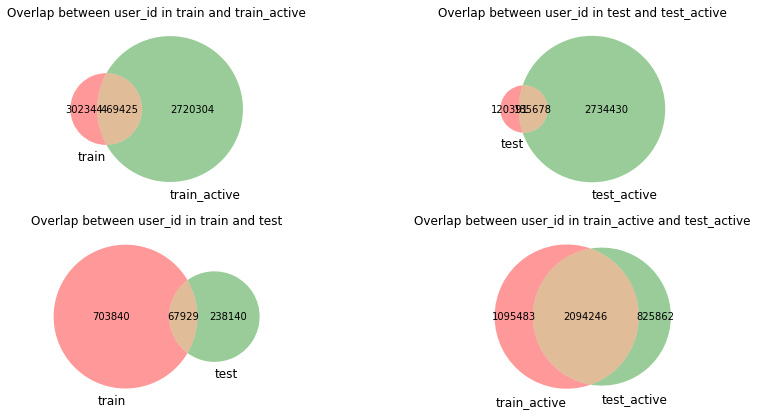

In [ ]:
# Venn diagrams
fig, axarr = plt.subplots(2, 2, figsize=(14, 7))

def get_venn(axarr, feature):
    axarr[0, 0].set_title(f'Overlap between {feature} in train and train_active')
    venn2([
        set(train[feature].values), 
        set(train_active[feature].values)
    ], set_labels = ('train', 'train_active'), ax=axarr[0, 0])

    axarr[0, 1].set_title(f'Overlap between {feature} in test and test_active')
    venn2([
        set(test[feature].values), 
        set(test_active[feature].values)
    ], set_labels = ('test', 'test_active'), ax=axarr[0, 1])

    axarr[1, 0].set_title(f'Overlap between {feature} in train and test')
    venn2([
        set(train[feature].values), 
        set(test[feature].values)
    ], set_labels = ('train', 'test'), ax=axarr[1, 0])

    axarr[1, 1].set_title(f'Overlap between {feature} in train_active and test_active')
    venn2([
        set(train_active[feature].values), 
        set(test_active[feature].values)
    ], set_labels = ('train_active', 'test_active'), ax=axarr[1, 1])
    
get_venn(axarr, 'user_id')

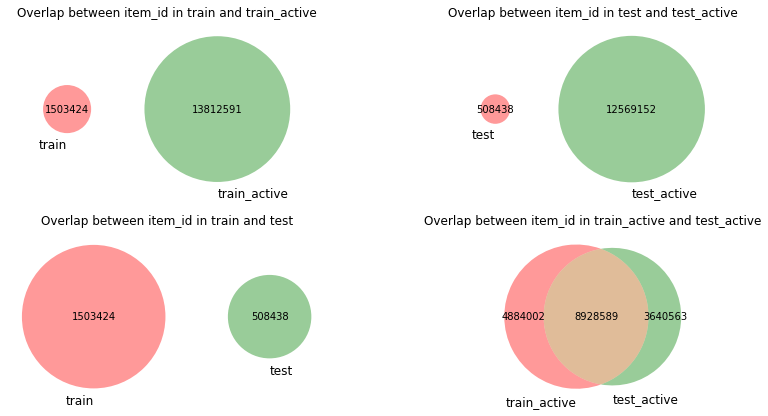

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 7))

get_venn(axarr, 'item_id')

In [ ]:
all_samples = pd.concat([
    train,
    train_active,
    test,
    test_active
]).reset_index(drop=True)
all_samples.drop_duplicates(['item_id'], inplace=True)

del train_active
del test_active
gc.collect()

15

In [ ]:
all_periods = pd.concat([
    train_periods,
    test_periods
])

del train_periods
del test_periods
gc.collect()

all_periods.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [ ]:
all_periods['days_up'] = all_periods['date_to'].dt.dayofyear - all_periods['date_from'].dt.dayofyear

In [ ]:
gp = all_periods.groupby(['item_id'])[['days_up']]

gp_df = pd.DataFrame()
gp_df['days_up_sum'] = gp.sum()['days_up']
gp_df['times_put_up'] = gp.count()['days_up']
gp_df.reset_index(inplace=True)
gp_df.rename(index=str, columns={'index': 'item_id'})

gp_df.head()

,item_id,days_up_sum,times_put_up
0,00000077ff21,13,1
1,000002c54018,6,1
2,000005570503,1,1
3,0000060018e6,6,1
4,000006497719,19,2


In [ ]:
all_periods.drop_duplicates(['item_id'], inplace=True)
all_periods = all_periods.merge(gp_df, on='item_id', how='left')
all_periods.head()

,item_id,activation_date,date_from,date_to,days_up,days_up_sum,times_put_up
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1,17,4
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3,18,3
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13,19,2
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9,17,4
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13,18,3


In [ ]:
all_periods = all_periods.merge(all_samples, on='item_id', how='left')
all_periods.head()

,item_id,activation_date,date_from,date_to,days_up,days_up_sum,times_put_up,user_id
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1,17,4,e292cce69842
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3,18,3,a326c04a24ec
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13,19,2,06d275498a56
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9,17,4,831c8c4a622c
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13,18,3,248102e50d79


In [ ]:
gp = all_periods.groupby(['user_id'])[['days_up_sum', 'times_put_up']].mean().reset_index() \
    .rename(index=str, columns={
        'days_up_sum': 'avg_days_up_user',
        'times_put_up': 'avg_times_up_user'
    })
gp.head()

,user_id,avg_days_up_user,avg_times_up_user
0,00000077ff21,12.5,2.00
1,000006497719,19.0,2.00
2,00000b4d72f6,3.0,1.00
3,00000d642d7e,13.0,1.00
4,0000126b80a4,12.0,1.75


In [ ]:
n_user_items = all_samples.groupby(['user_id'])[['item_id']].count().reset_index() \
    .rename(index=str, columns={
        'item_id': 'n_user_items'
    })
gp = gp.merge(n_user_items, on='user_id', how='outer')

gp.head()

,user_id,avg_days_up_user,avg_times_up_user,n_user_items
0,00000077ff21,12.5,2.00,2
1,000006497719,19.0,2.00,1
2,00000b4d72f6,3.0,1.00,1
3,00000d642d7e,13.0,1.00,2
4,0000126b80a4,12.0,1.75,8


In [ ]:
gp.to_csv('aggregated_feats.csv', index=False)

In [ ]:
!cp "aggregated_feats.csv" "/content/drive/My Drive/avito_kaggle"

In [ ]:
del all_samples
del all_periods
del train
del test

gc.collect()

44

In [ ]:
train = pd.read_csv('/content/drive/My Drive/avito_kaggle/train.csv')
test = pd.read_csv('/content/drive/My Drive/avito_kaggle/test.csv')

train = train.merge(gp, on='user_id', how='left')
test = test.merge(gp, on='user_id', how='left')

agg_cols = list(gp.columns)[1:]

del gp
gc.collect()

train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,avg_days_up_user,avg_times_up_user,n_user_items
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,8.000000,2.000000,2
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,NaN,NaN,1
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,4.428571,1.142857,9
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,16.714286,2.642857,32
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,NaN,NaN,1


In [ ]:
train[agg_cols].isna().any(axis=1).sum() / len(train) * 100

22.407185198586692

In [ ]:
test[agg_cols].isna().any(axis=1).sum() / len(test) * 100

24.354198545348694

In [ ]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])


for df in [train, test]:
    df['description'].fillna('unknowndescription', inplace=True)
    df['title'].fillna('unknowntitle', inplace=True)

    df['weekday'] = pd.to_datetime(df['activation_date']).dt.day
    
    for col in ['description', 'title']:
        df['num_words_' + col] = df[col].apply(lambda comment: len(comment.split()))
        df['num_unique_words_' + col] = df[col].apply(lambda comment: len(set(w for w in comment.split())))

    df['words_vs_unique_title'] = df['num_unique_words_title'] / df['num_words_title'] * 100
    df['words_vs_unique_description'] = df['num_unique_words_description'] / df['num_words_description'] * 100
    
    df['city'] = df['region'] + '_' + df['city']
    df['num_desc_punct'] = df['description'].apply(lambda x: count(x, set(string.punctuation)))
    
    for col in agg_cols:
        df[col].fillna(-1, inplace=True)

In [ ]:
!python -m nltk.downloader stopwords

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
count_vectorizer_title = CountVectorizer(stop_words=stopwords.words('russian'), lowercase=True, min_df=25)

title_counts = count_vectorizer_title.fit_transform(train['title'].append(test['title']))

train_title_counts = title_counts[:len(train)]
test_title_counts = title_counts[len(train):]


count_vectorizer_desc = TfidfVectorizer(stop_words=stopwords.words('russian'), 
                                        lowercase=True, ngram_range=(1, 2),
                                        max_features=15000)

desc_counts = count_vectorizer_desc.fit_transform(train['description'].append(test['description']))

train_desc_counts = desc_counts[:len(train)]
test_desc_counts = desc_counts[len(train):]

train_title_counts.shape, train_desc_counts.shape

((1503424, 16447), (1503424, 15000))

In [ ]:
target = 'deal_probability'
predictors = [
    'num_desc_punct', 
    'words_vs_unique_description', 'num_unique_words_description', 'num_unique_words_title', 'num_words_description', 'num_words_title',
    'avg_times_up_user', 'avg_days_up_user', 'n_user_items', 
    'price', 'item_seq_number'
]
categorical = [
    'image_top_1', 'param_1', 'param_2', 'param_3', 
    'city', 'region', 'category_name', 'parent_category_name', 'user_type'
]

predictors = predictors + categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for feature in categorical:
    print(f'Transforming {feature}...')
    encoder = LabelEncoder()
    encoder.fit(train[feature].append(test[feature]).astype(str))
    
    train[feature] = encoder.transform(train[feature].astype(str))
    test[feature] = encoder.transform(test[feature].astype(str))

Transforming image_top_1...
Transforming param_1...
Transforming param_2...
Transforming param_3...
Transforming city...
Transforming region...
Transforming category_name...
Transforming parent_category_name...
Transforming user_type...


In [ ]:
rounds = 16000
early_stop_rounds = 500
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 32,
    'max_depth': 15,
    'learning_rate' : 0.02,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}

feature_names = np.hstack([
    count_vectorizer_desc.get_feature_names(),
    count_vectorizer_title.get_feature_names(),
    predictors
])
print('Number of features:', len(feature_names))

Number of features: 31467


In [ ]:
import scipy

In [ ]:
train_index, valid_index = train_test_split(np.arange(len(train)), test_size=0.1, random_state=42)

x_train = scipy.sparse.hstack([
        train_desc_counts[train_index],
        train_title_counts[train_index],
        train.loc[train_index, predictors]
], format='csr')
y_train = train.loc[train_index, target]

x_valid = scipy.sparse.hstack([
    train_desc_counts[valid_index],
    train_title_counts[valid_index],
    train.loc[valid_index, predictors]
], format='csr')
y_valid = train.loc[valid_index, target]

x_test = scipy.sparse.hstack([
    test_desc_counts,
    test_title_counts,
    test.loc[:, predictors]
], format='csr')

dtrain = lgb.Dataset(x_train, label=y_train,
                     feature_name=list(feature_names), 
                     categorical_feature=categorical)
dvalid = lgb.Dataset(x_valid, label=y_valid,
                     feature_name=list(feature_names), 
                     categorical_feature=categorical)

In [ ]:
evals_result = {}
model = lgb.train(params, dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train', 'valid'],
                  num_boost_round=rounds, 
                  early_stopping_rounds=early_stop_rounds, 
                  verbose_eval=500)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 500 rounds.
[500]	train's rmse: 0.220192	valid's rmse: 0.223264
[1000]	train's rmse: 0.216927	valid's rmse: 0.221589
[1500]	train's rmse: 0.21491	valid's rmse: 0.220782
[2000]	train's rmse: 0.213416	valid's rmse: 0.220284
[2500]	train's rmse: 0.212189	valid's rmse: 0.219943
[3000]	train's rmse: 0.211113	valid's rmse: 0.219701
[3500]	train's rmse: 0.210156	valid's rmse: 0.219506
[4000]	train's rmse: 0.20928	valid's rmse: 0.219361
[4500]	train's rmse: 0.208412	valid's rmse: 0.219229
[5000]	train's rmse: 0.207642	valid's rmse: 0.219129
[5500]	train's rmse: 0.206904	valid's rmse: 0.219034
[6000]	train's rmse: 0.206182	valid's rmse: 0.218957
[6500]	train's rmse: 0.205486	valid's rmse: 0.218891
[7000]	train's rmse: 0.204824	valid's rmse: 0.218821
[7500]	train's rmse: 0.204159	valid's rmse: 0.218757
[8000]	train's rmse: 0.203522	valid's rmse: 0.218705
[8500]	train's rmse: 0.202901	valid's rmse: 0.218651
[9000]	train's rmse: 0.202286	valid's r

Text(0.5, 1.0, 'Light GBM Feature Importance')

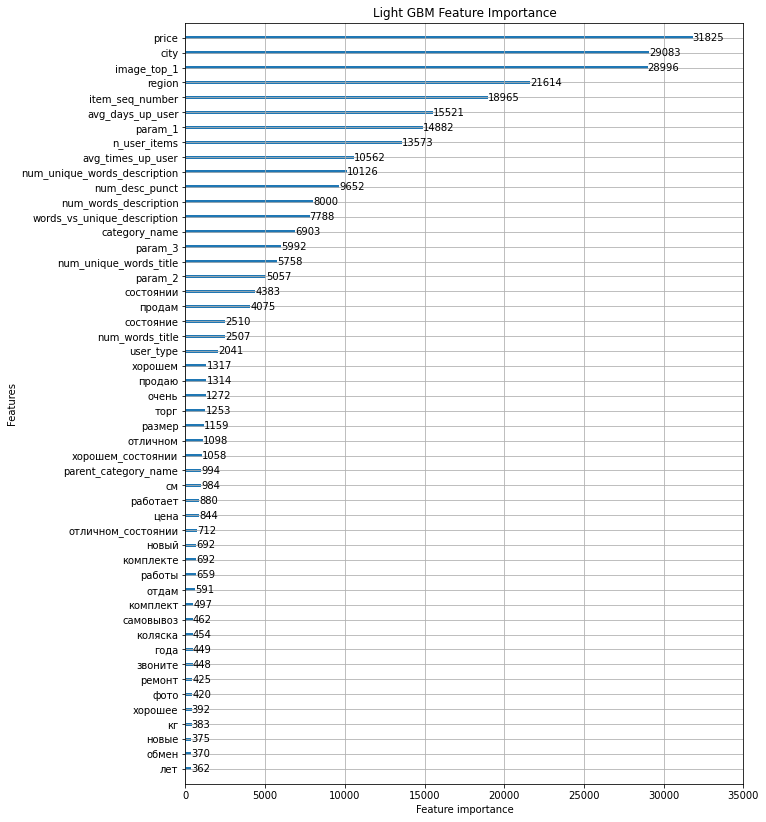

In [ ]:
fig, ax = plt.subplots(figsize=(10, 14))
lgb.plot_importance(model, max_num_features=50, ax=ax)
plt.title("Light GBM Feature Importance")

In [ ]:
!unzip '/content/drive/My Drive/avito_kaggle/sample_submission.csv.zip'

Archive:  /content/drive/My Drive/avito_kaggle/sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   


In [ ]:
!cp "sample_submission.csv" "/content/drive/My Drive/avito_kaggle"

In [ ]:
subm = pd.read_csv('/content/drive/My Drive/avito_kaggle/sample_submission.csv')
subm['deal_probability'] = np.clip(model.predict(x_test), 0, 1)
subm.to_csv('submission1.csv', index=False)

In [ ]:
!cp "submission1.csv" "/content/drive/My Drive/avito_kaggle"